# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Data** **Validation**
The dataset has 947 rows and 8 columns. I have validated each column as follows:
-  Recipe: has 947 unique entries, no missing values. No need for cleaning
-  category: has 11 unique values as opposed to said 10. Chicken breast is the extra category. I have decided to merge it into chicken category after comparing their stats.
- calories: 52 missing values. I have to decided to impute them using category median sensitive to outiers
-  carbohydrate: 52 missing values. I have to decided to impute them using category median sensitive to outiers
-  sugar: 52 missing values. I have to decided to impute them using category median sensitive to outiers
-  protein: 52 missing values. I have to decided to impute them using category median sensitive to outiers
-  servings: no missing values. I have extracted only the digits and converted it to numeric.
- high_traffic: 373 missing values. I have filled them with 'Low"

In [61]:
# Start coding here...
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [62]:
# load and view the data
data = pd.read_csv('recipe_site_traffic_2212.csv')
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [63]:
# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [64]:
# validate unique identifier per recipe
data['recipe'].nunique()

947

In [65]:
# validate 10 unique categories
data['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [66]:
# Calculate median nutritional values for both chicken categories
chicken_stats =data[data["category"] == "Chicken"][["calories", "carbohydrate", "sugar", "protein"]].median()
chicken_breast_stats = data[data["category"] == "Chicken Breast"][["calories", "carbohydrate", "sugar", "protein"]].median()
print('chicken stats:\n', chicken_stats)
print('\n chicken breast stats:', chicken_breast_stats)

chicken stats:
 calories        379.87
carbohydrate     18.11
sugar             3.17
protein          32.98
dtype: float64

 chicken breast stats: calories        371.335
carbohydrate     13.475
sugar             3.645
protein          37.770
dtype: float64


In [67]:
# merge chicken breast with chicken
data["category"] = data["category"].replace("Chicken Breast", "Chicken")

In [68]:
# validate calories column
print(data['calories'].isna().sum())

# fill null with median calories
calories_mean = data.groupby('category')['calories'].transform('median')
data['calories'] = data['calories'].fillna(calories_mean)
print(data['calories'].isna().sum())

52
0


In [69]:
# validate carbohydrate column
print(data['carbohydrate'].isna().sum())

# fill null with median
calories_mean = data.groupby('category')['carbohydrate'].transform('median')
data['carbohydrate'] = data['carbohydrate'].fillna(calories_mean)
print(data['carbohydrate'].isna().sum())

52
0


In [70]:
# validate sugar column
print(data['sugar'].isna().sum())
calories_mean = data.groupby('category')['sugar'].transform('median')
data['sugar'] = data['sugar'].fillna(calories_mean)
print(data['sugar'].isna().sum())

52
0


In [71]:
# validate protein column
print(data['protein'].isna().sum())
calories_mean = data.groupby('category')['protein'].transform('median')
data['protein'] = data['protein'].fillna(calories_mean)
print(data['protein'].isna().sum())

52
0


In [72]:
# validate servings
data['servings'].unique()

# extract digits only and convert to numeric
data['servings'] = data['servings'].str.extract("(\\d+)").astype(int)
print(data['servings'].dtype)

int64


In [73]:
# validate high_trafffic
print(data['high_traffic'].isna().sum())
print(data['high_traffic'].unique())

# fill null with low
data['high_traffic'] = data['high_traffic'].fillna('Low')

373
['High' nan]


# **Exploratory** **Analysis**


numeric variables - calories, carbohydrate, sugar, protein


In [74]:
sns.set_style('whitegrid')
# summary statistics for numerical columns
data[['calories','carbohydrate','sugar','protein','servings']].describe()

,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,431.085544,34.449625,8.888728,23.938786,3.477297
std,441.366521,42.846480,14.371911,35.473402,1.732741
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,114.410000,9.135000,1.795000,3.465000,2.000000
50%,296.920000,21.190000,4.400000,11.240000,4.000000
75%,576.225000,42.590000,9.565000,29.820000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


From the histograms below we gather that:
- Calories : Right-skewed, with a few extreme high values.
-  Carbohydrates : Right-skewed, with most recipes below 100g.
-  Sugar : Strong right-skew, meaning a few recipes have very high sugar content.
-  Protein : Right-skewed, with a few very high-protein recipes.

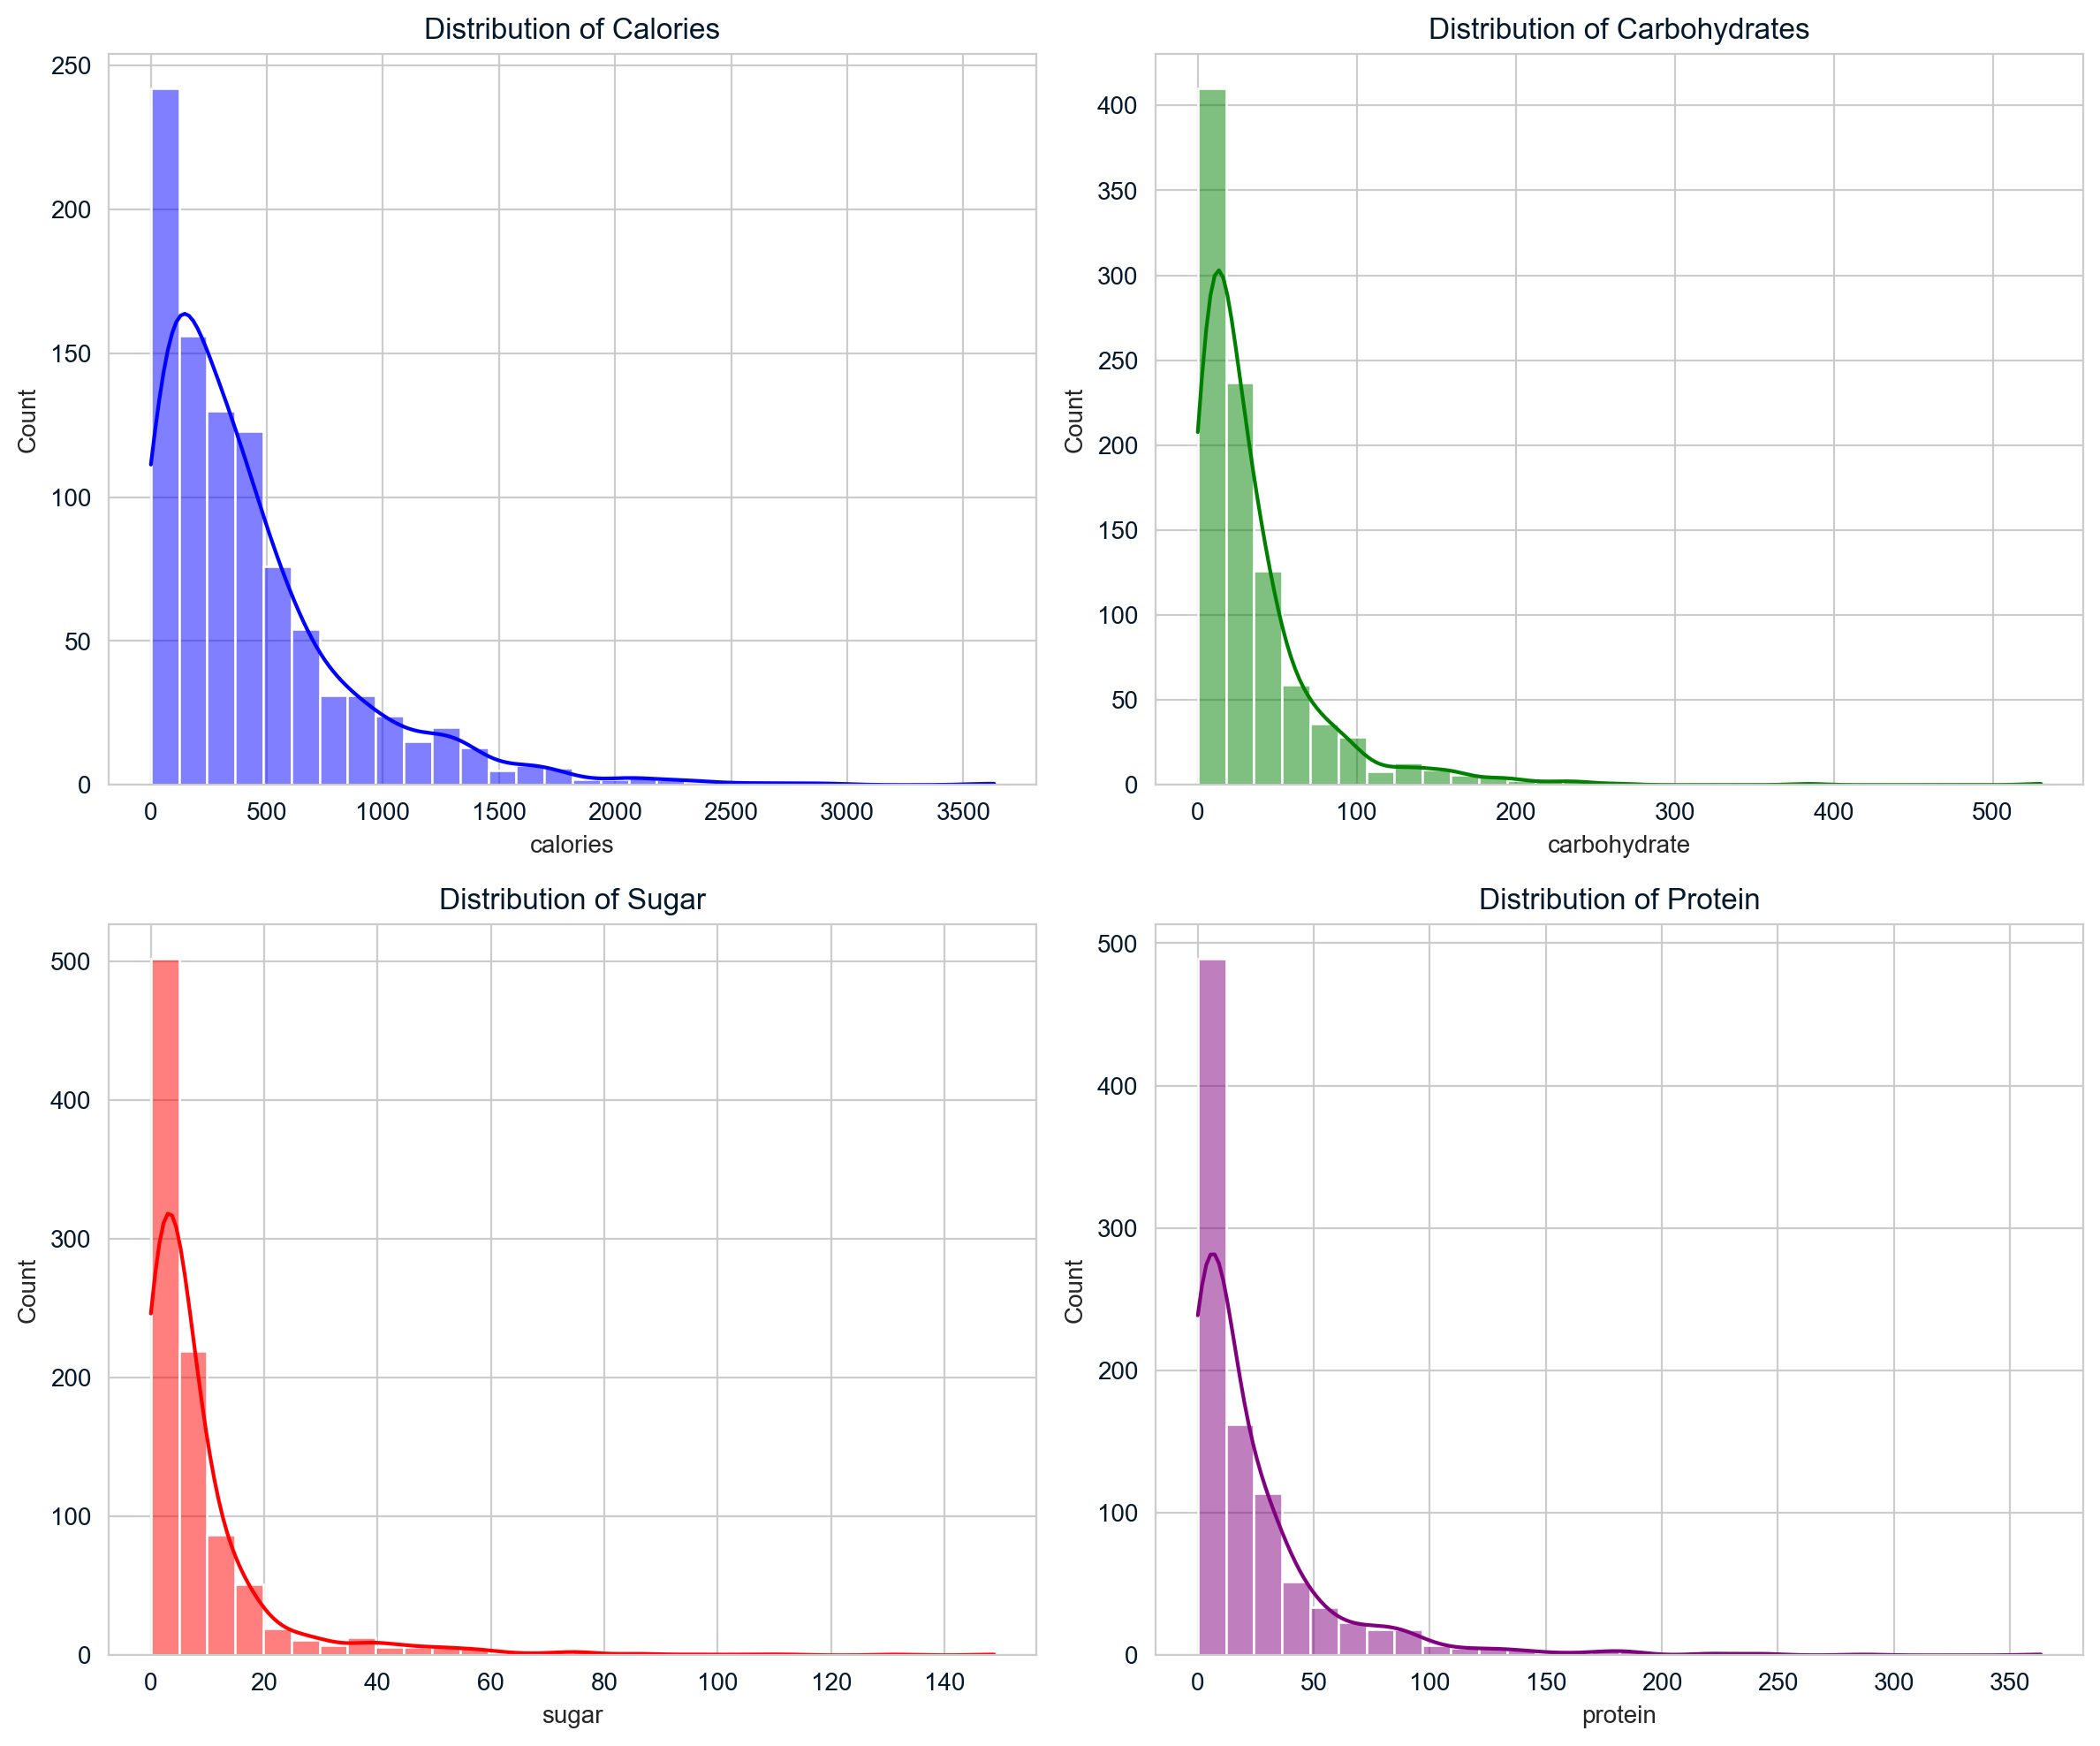

In [75]:
# Create histograms for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Calories Distribution
sns.histplot(data["calories"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Calories")

# Carbohydrate Distribution
sns.histplot(data["carbohydrate"], bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Carbohydrates")

# Sugar Distribution
sns.histplot(data["sugar"], bins=30, kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Distribution of Sugar")

# Protein Distribution
sns.histplot(data["protein"], bins=30, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribution of Protein")

plt.tight_layout()
plt.show()

From the boxplots we gather that:
- Calories : Several extreme outliers above 2000 kcal, with one reaching 3600 kcal.
-  Carbohydrates : Outliers beyond 200g, with a max near 530g.
- Sugar : Right-skewed with a few recipes exceeding 100g of sugar.
-  Protein : Some extreme high-protein recipes, reaching 360g.

We will have to standardize these features during modelling

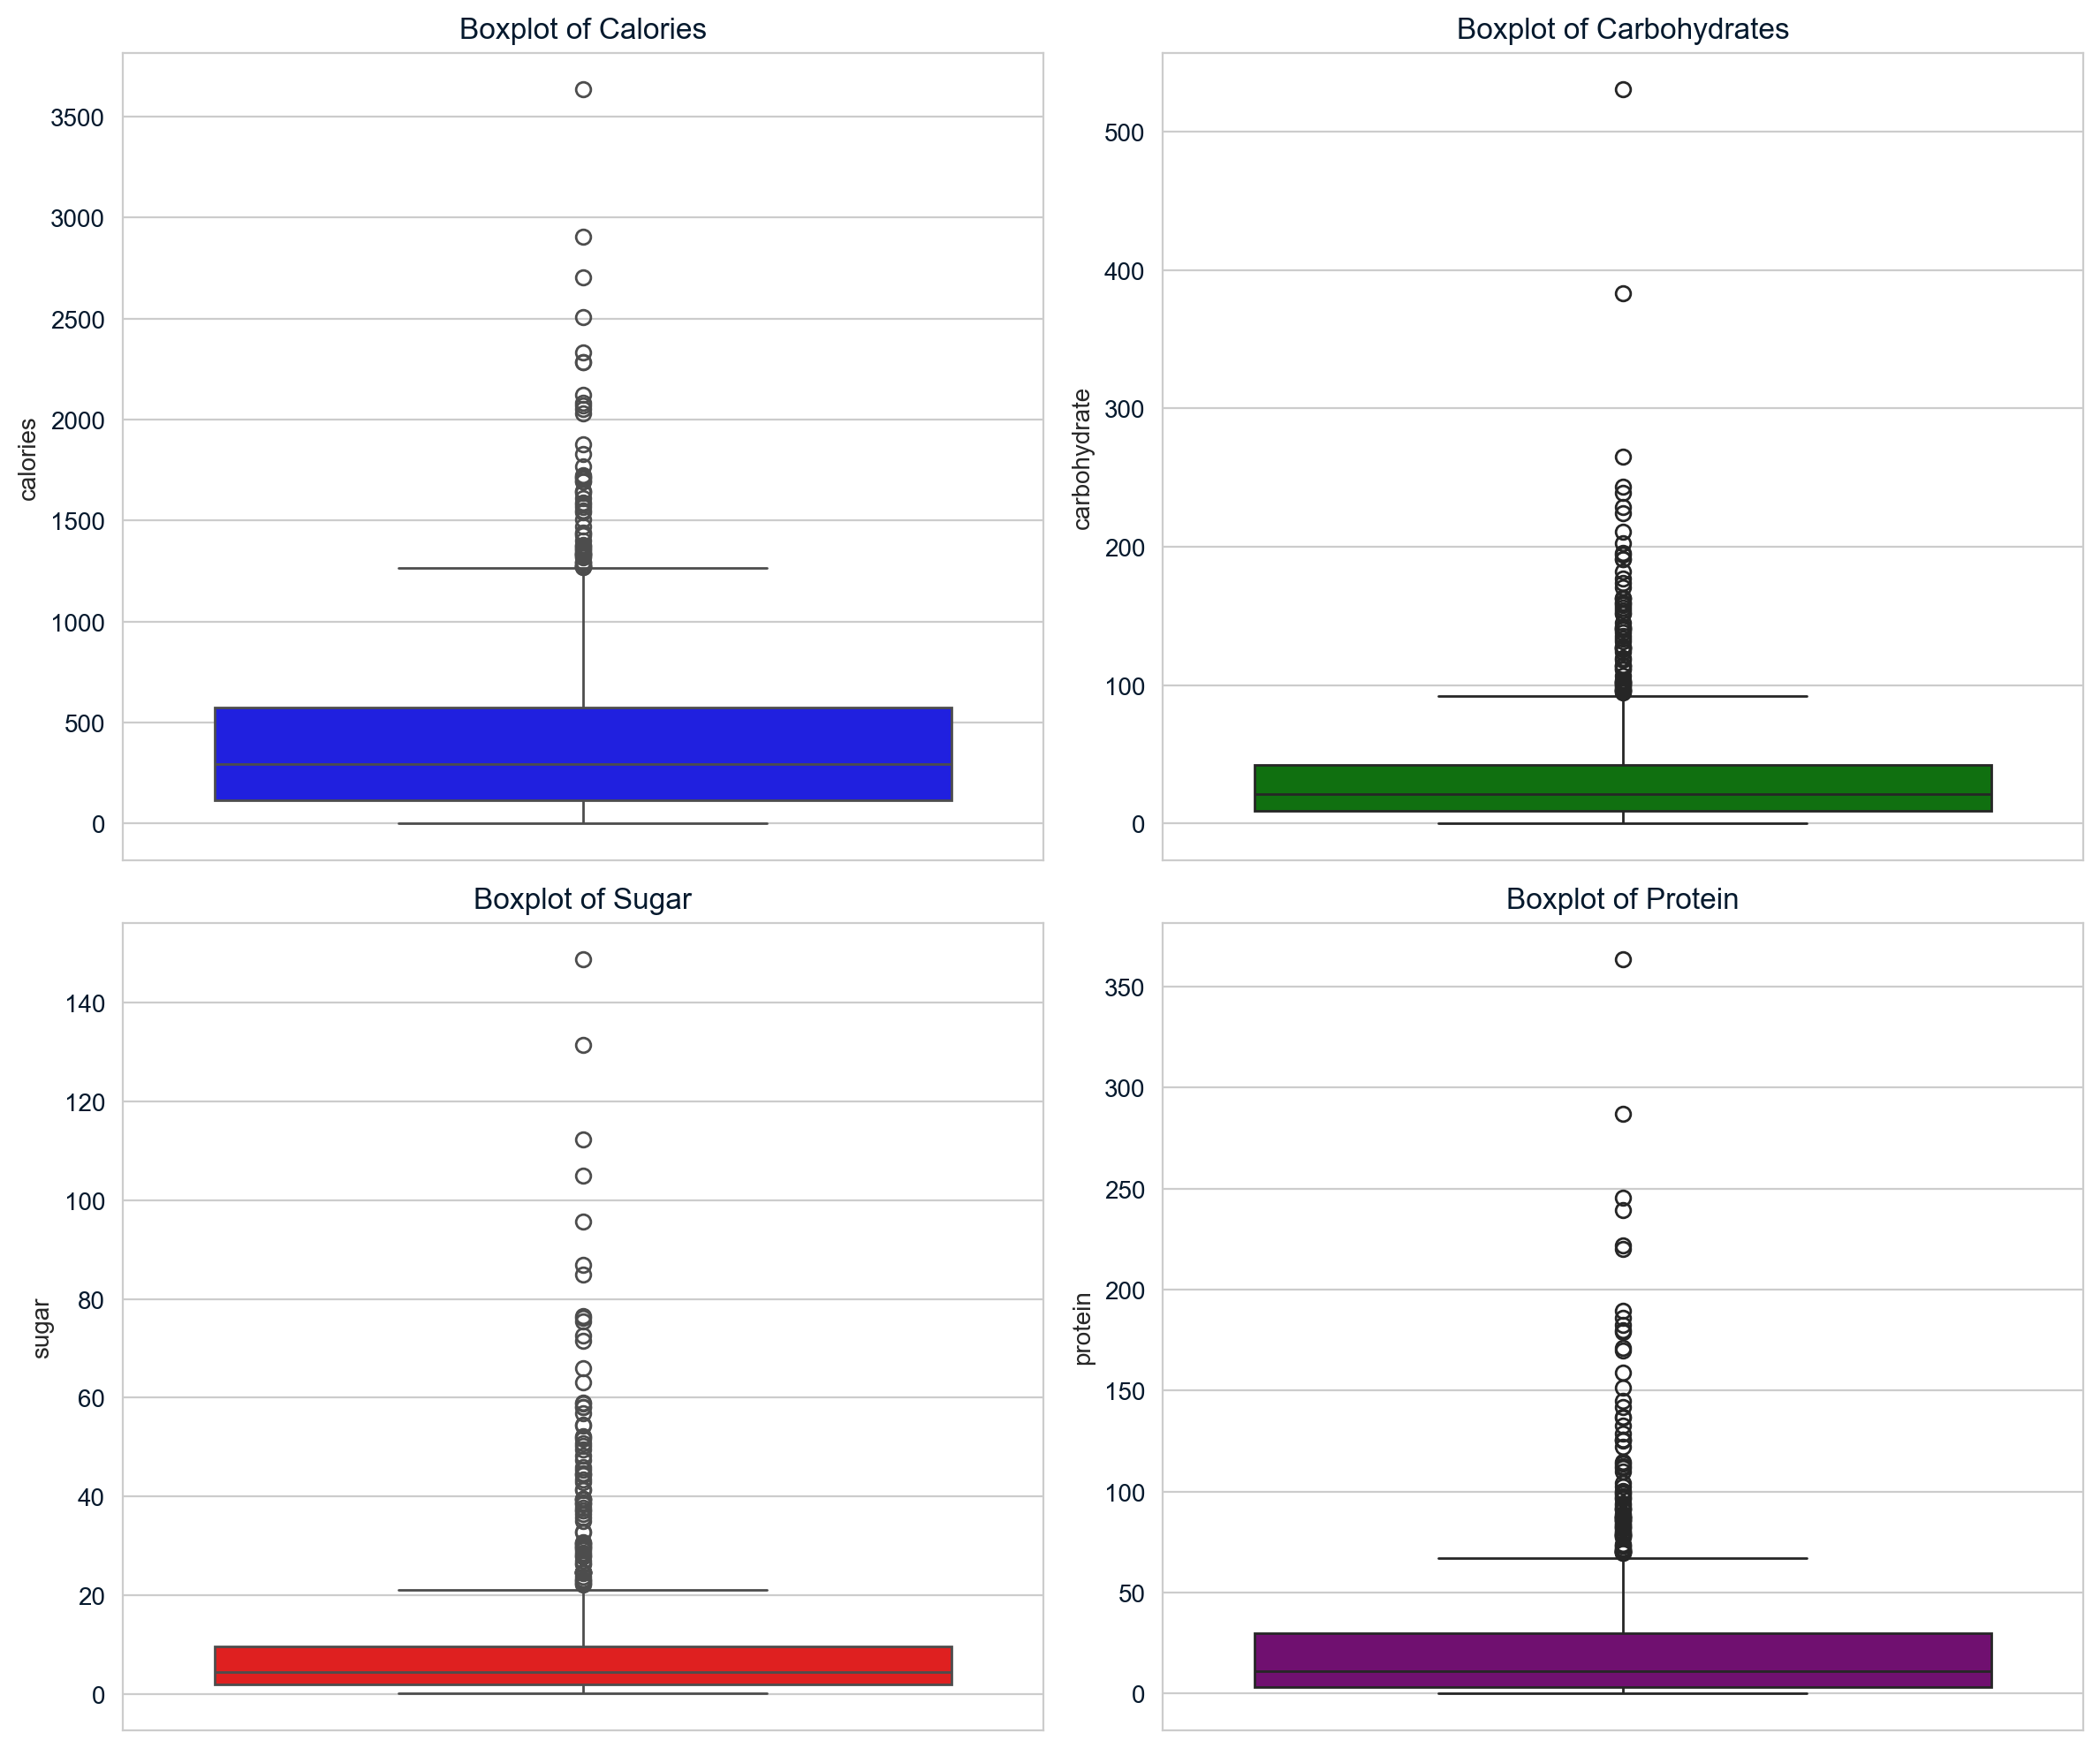

In [76]:
# Create boxplots for numerical columns to detect outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Calories Boxplot
sns.boxplot(y=data["calories"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Boxplot of Calories")

# Carbohydrate Boxplot
sns.boxplot(y=data["carbohydrate"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Boxplot of Carbohydrates")

# Sugar Boxplot
sns.boxplot(y=data["sugar"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Boxplot of Sugar")

# Protein Boxplot
sns.boxplot(y=data["protein"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Boxplot of Protein")

plt.tight_layout()
plt.show()


- From the correlation matrix, there are no significant linear relationships among the numeric features.

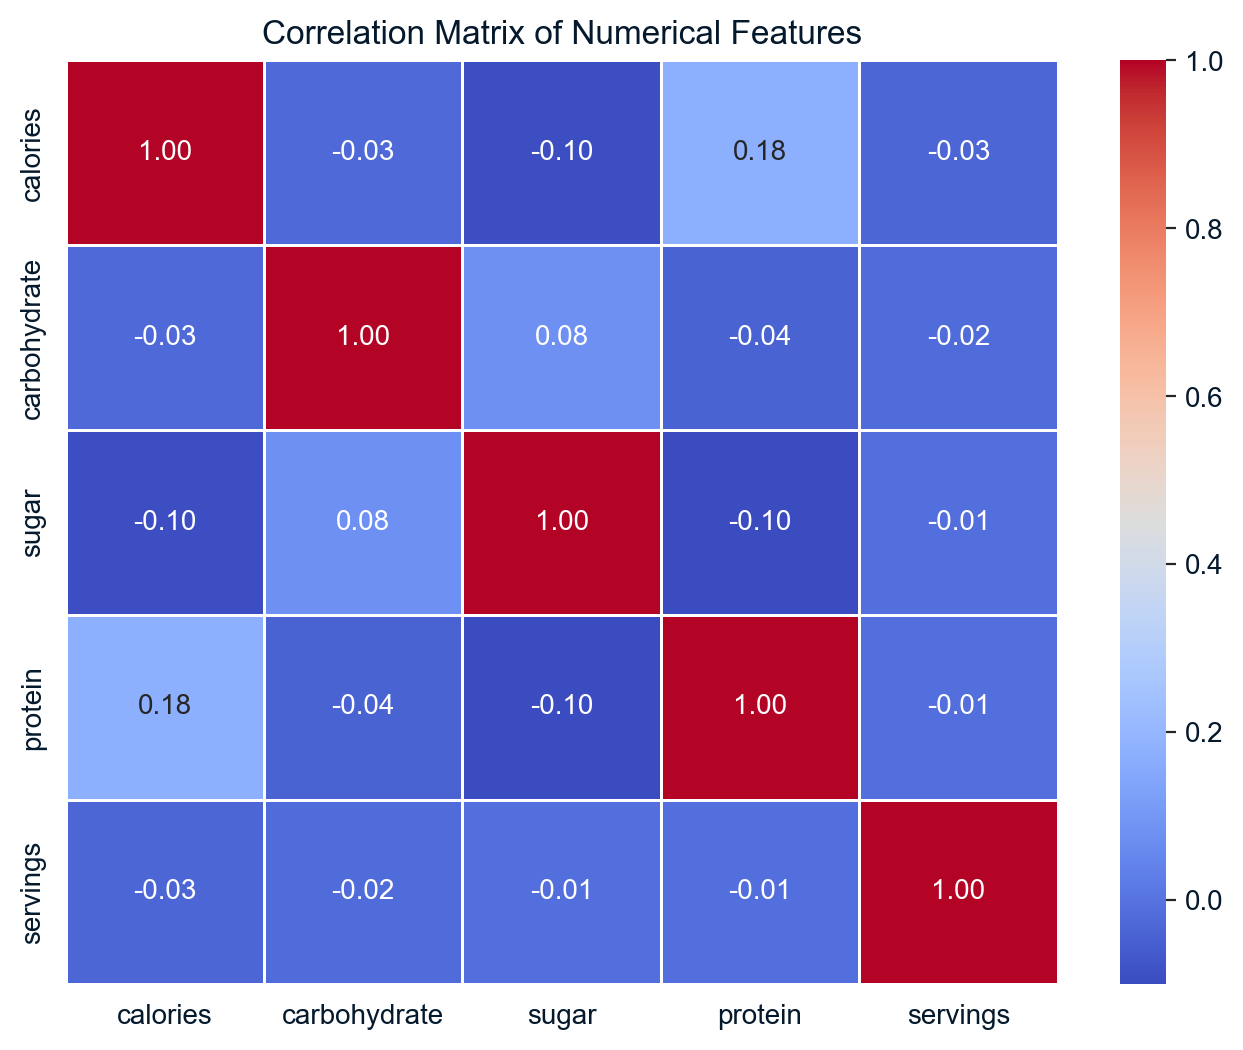

In [77]:
# Examine correlation among numeric features
# Compute correlation matrix
correlation_matrix = data[["calories", "carbohydrate", "sugar", "protein", "servings"]].corr()

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize title
plt.title("Correlation Matrix of Numerical Features")

# Show plot
plt.show()


Categorical feature - category
- From the barplot, chicken recipes are popular while other categories seem fairly balanced with beverages, breakfast also being common. One dish meal has the lowest popularity.

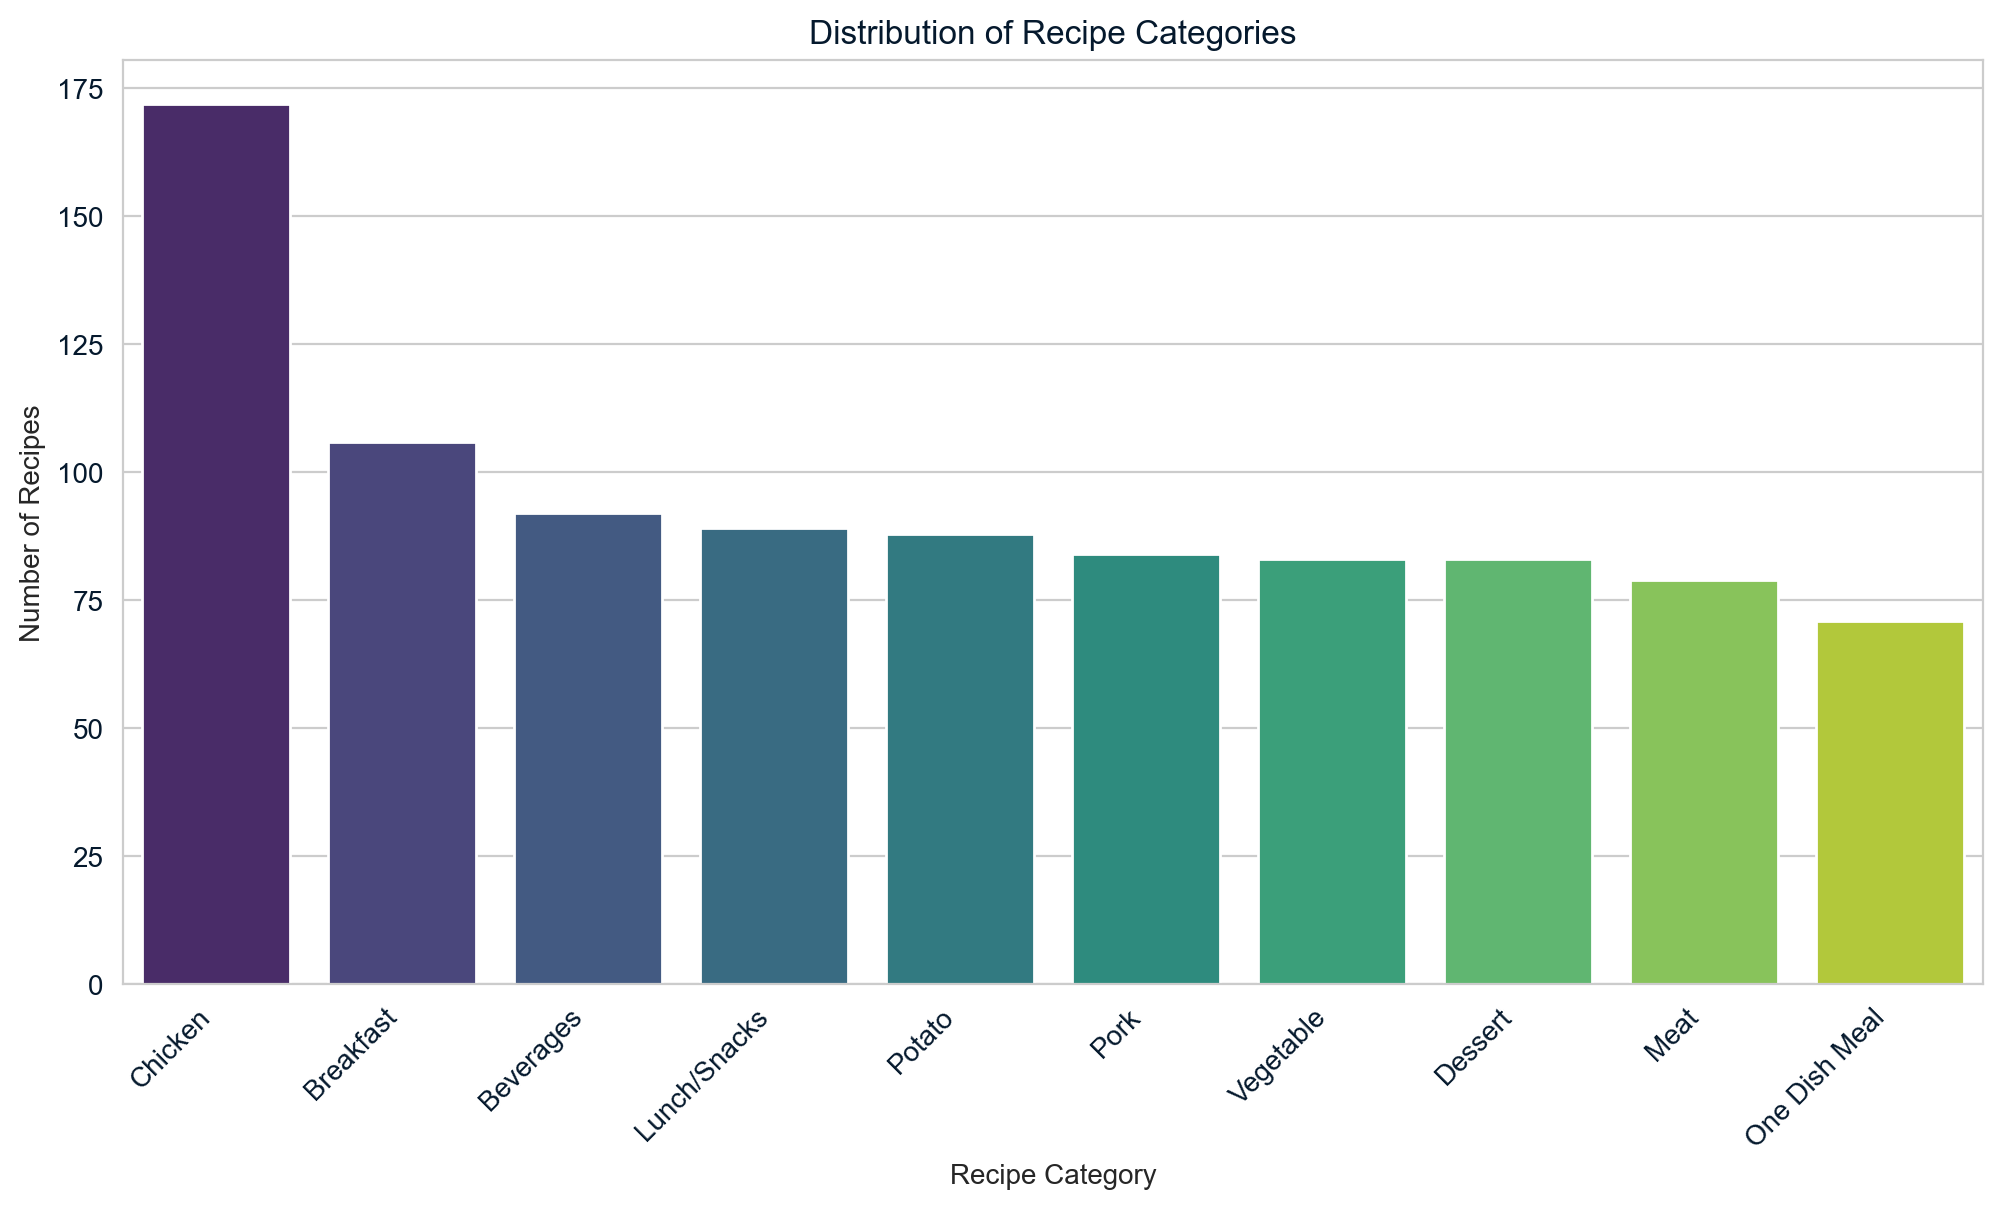

In [78]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot for category distribution
category_counts = data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values,palette="viridis")

# Customize labels and title
plt.xticks(rotation=45, ha="right")  # Rotate category names for readability
plt.xlabel("Recipe Category")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Recipe Categories")

# Show plot
plt.show()

**Target variable** - traffic high
- Since we need to predict traffic flow, traffic_high will be our target variable.
The classes are imbalanced, we'll have to stratify during modelling.

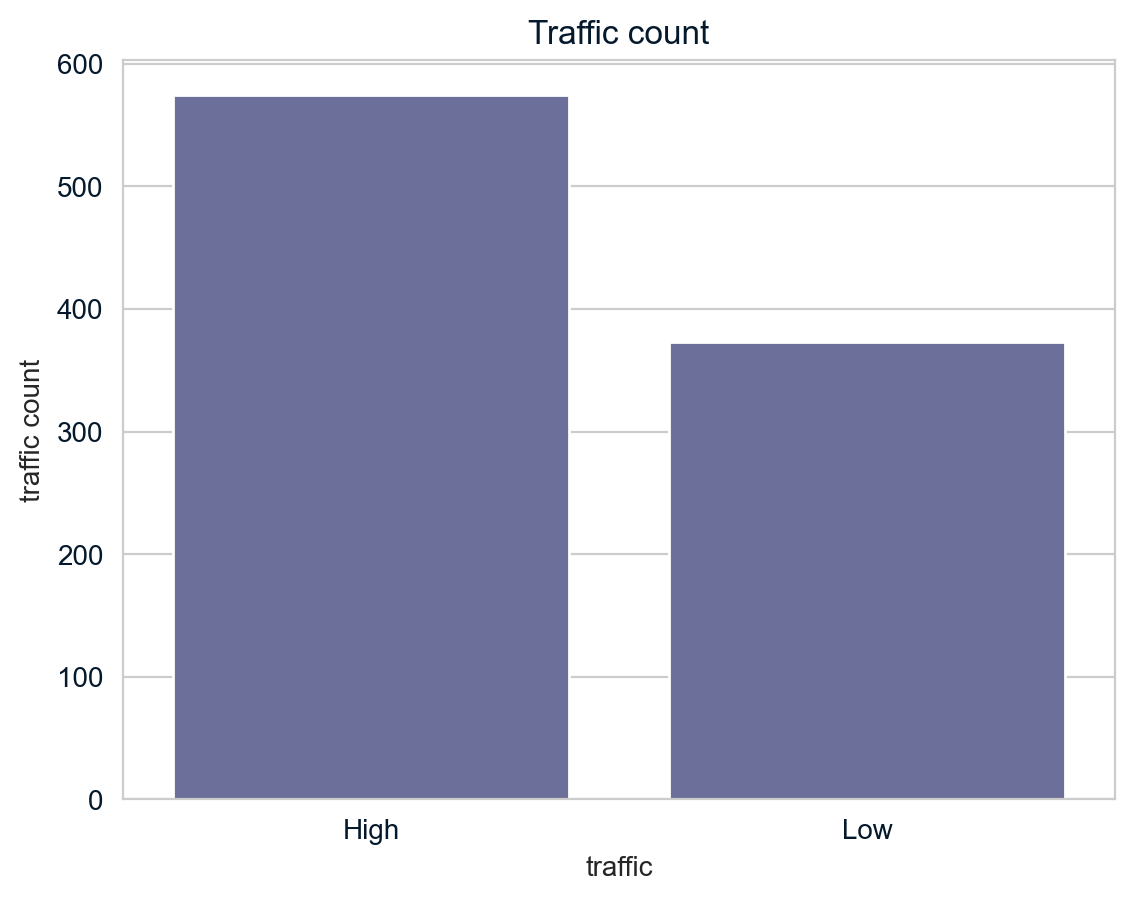

In [79]:
sns.countplot(x='high_traffic', data=data)
plt.xlabel('traffic')
plt.ylabel('traffic count')
plt.title('Traffic count')
plt.show()

**Numeric features vs target variable**
- High-protein recipes could be attracting more users, possibly due to health-conscious audiences.

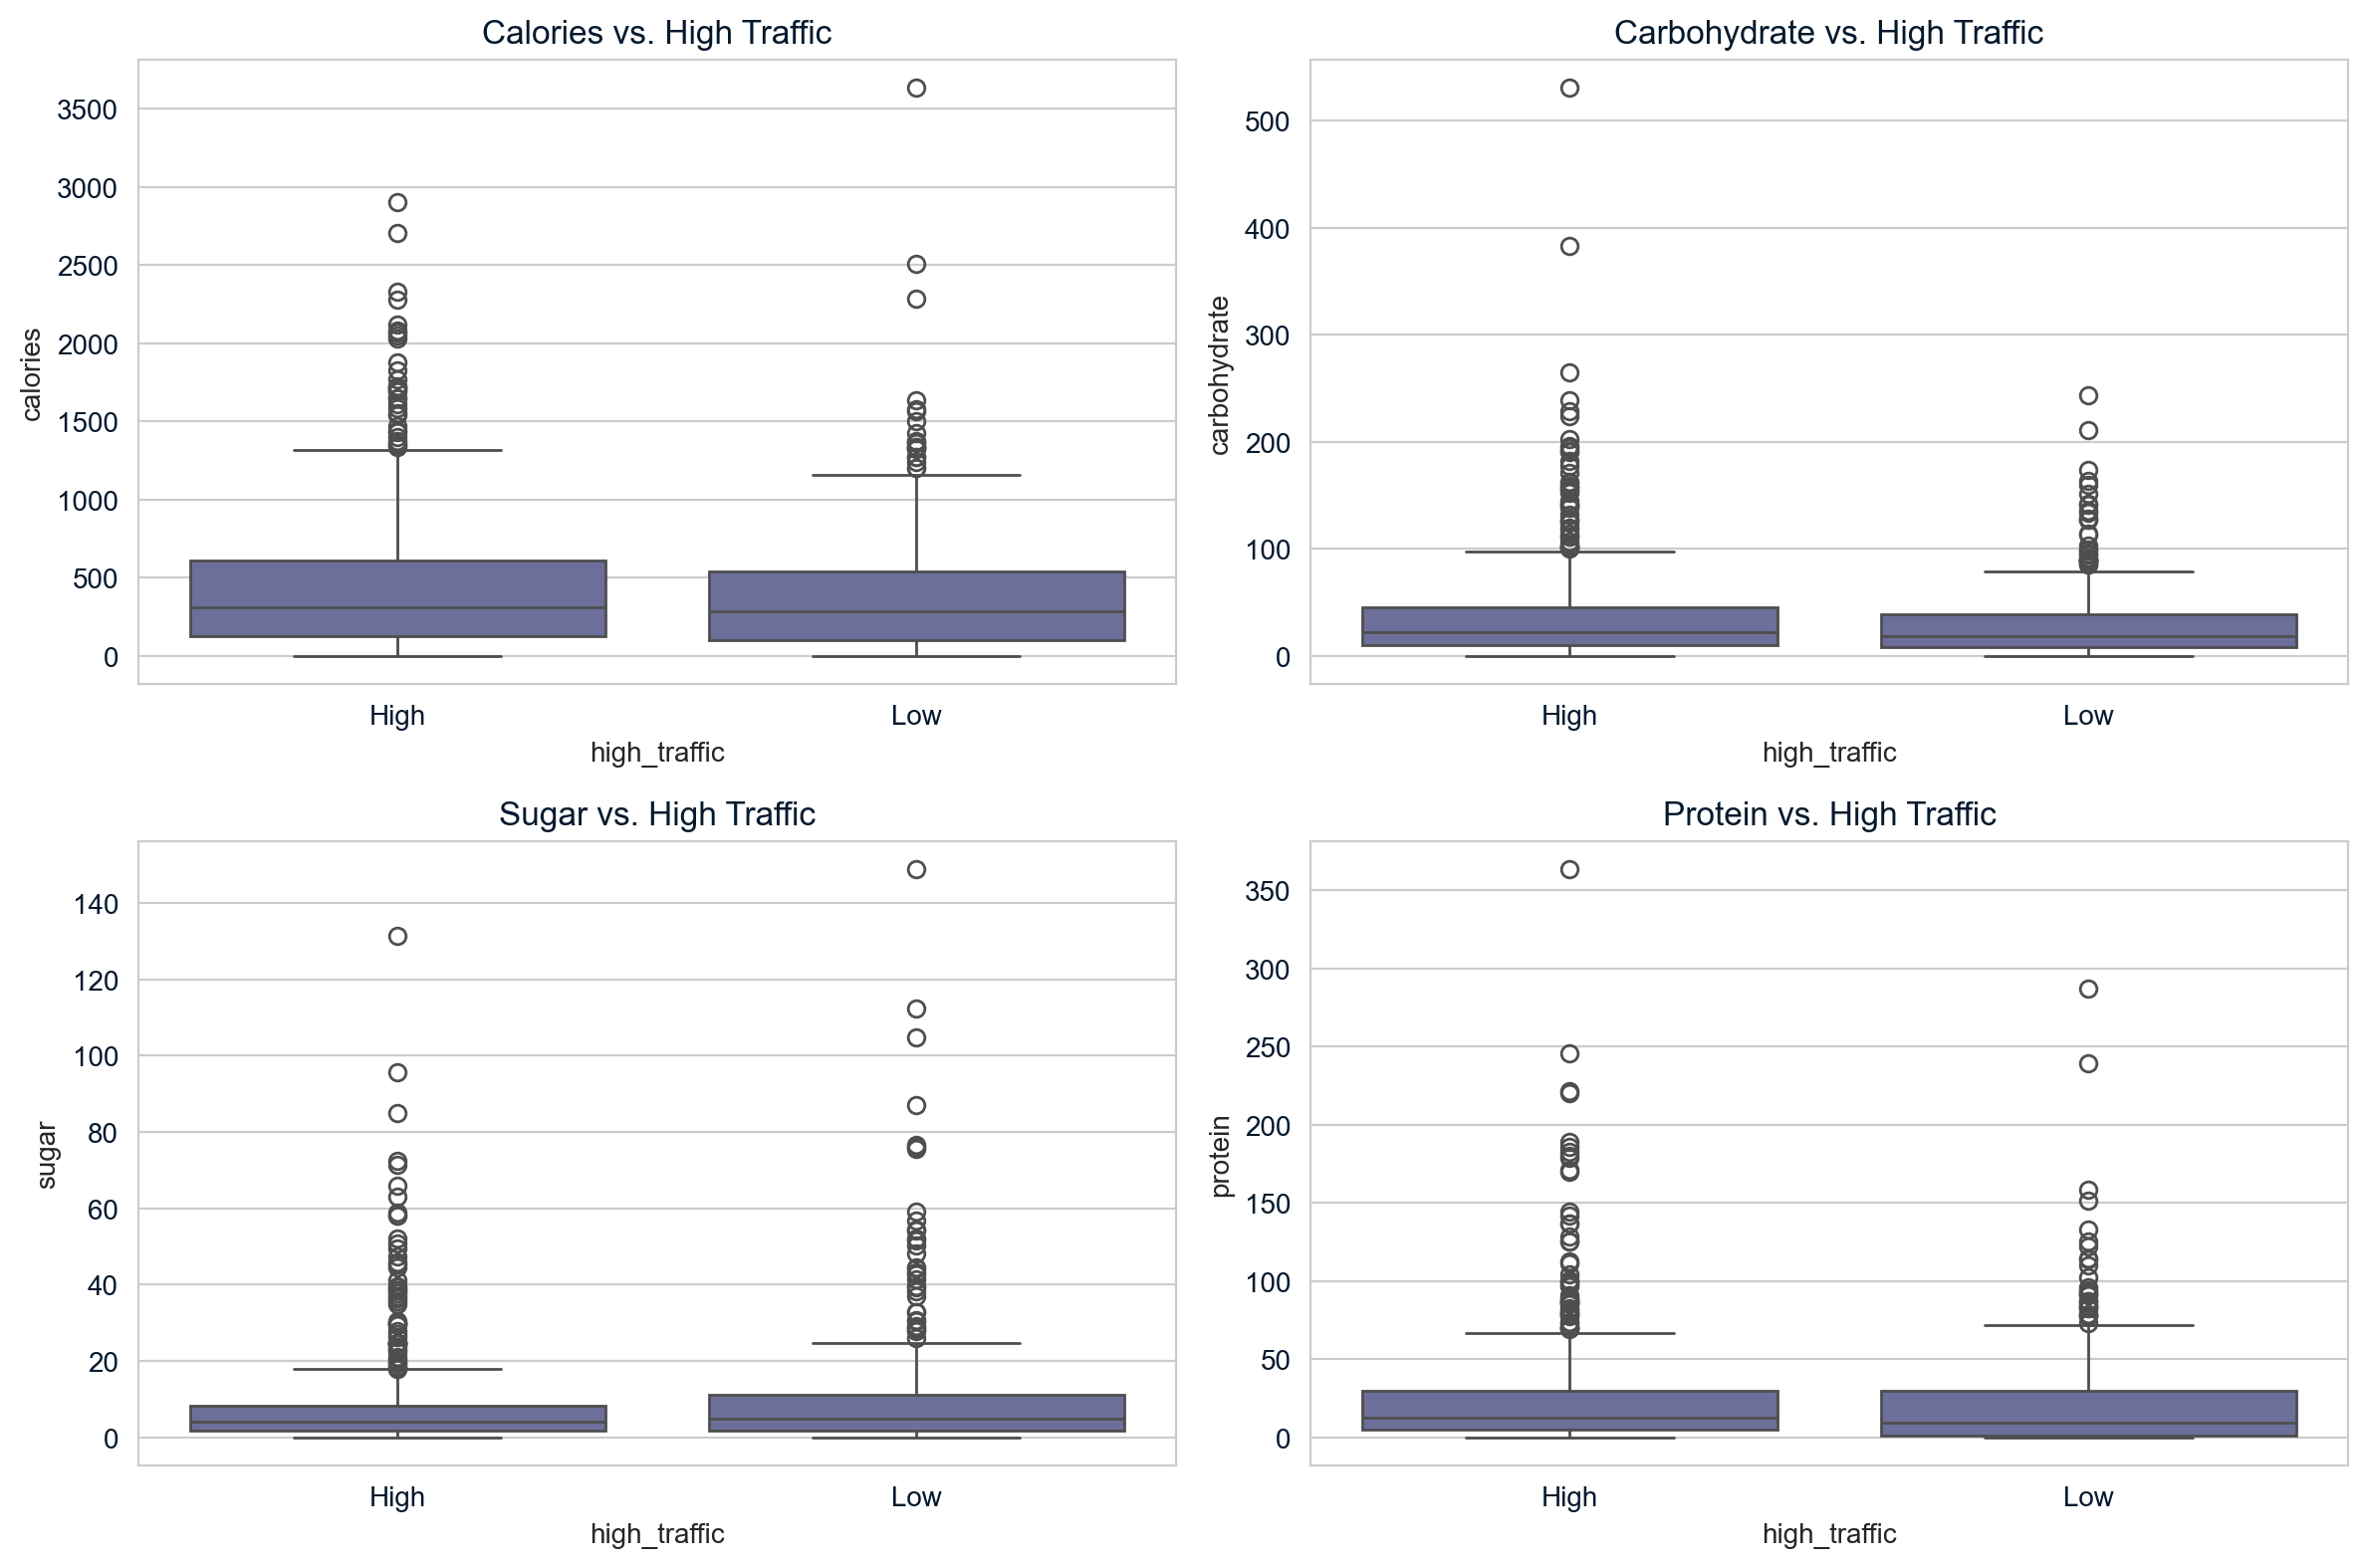

In [80]:
# Set figure size
plt.figure(figsize=(12, 8))

# Loop through each feature and create a boxplot
for i, feature in enumerate(["calories", "carbohydrate", "sugar", "protein"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data["high_traffic"], y=data[feature])
    plt.title(f"{feature.capitalize()} vs. High Traffic")

plt.tight_layout()
plt.show()

**Category vs target variable**
From the countplot:
- Pork,potato and vegetable tend to have more high traffic
- One dish meal, meat and desssert have moderate high traffic recipes
- Breakfast and beverages have fewer high traffic recipes


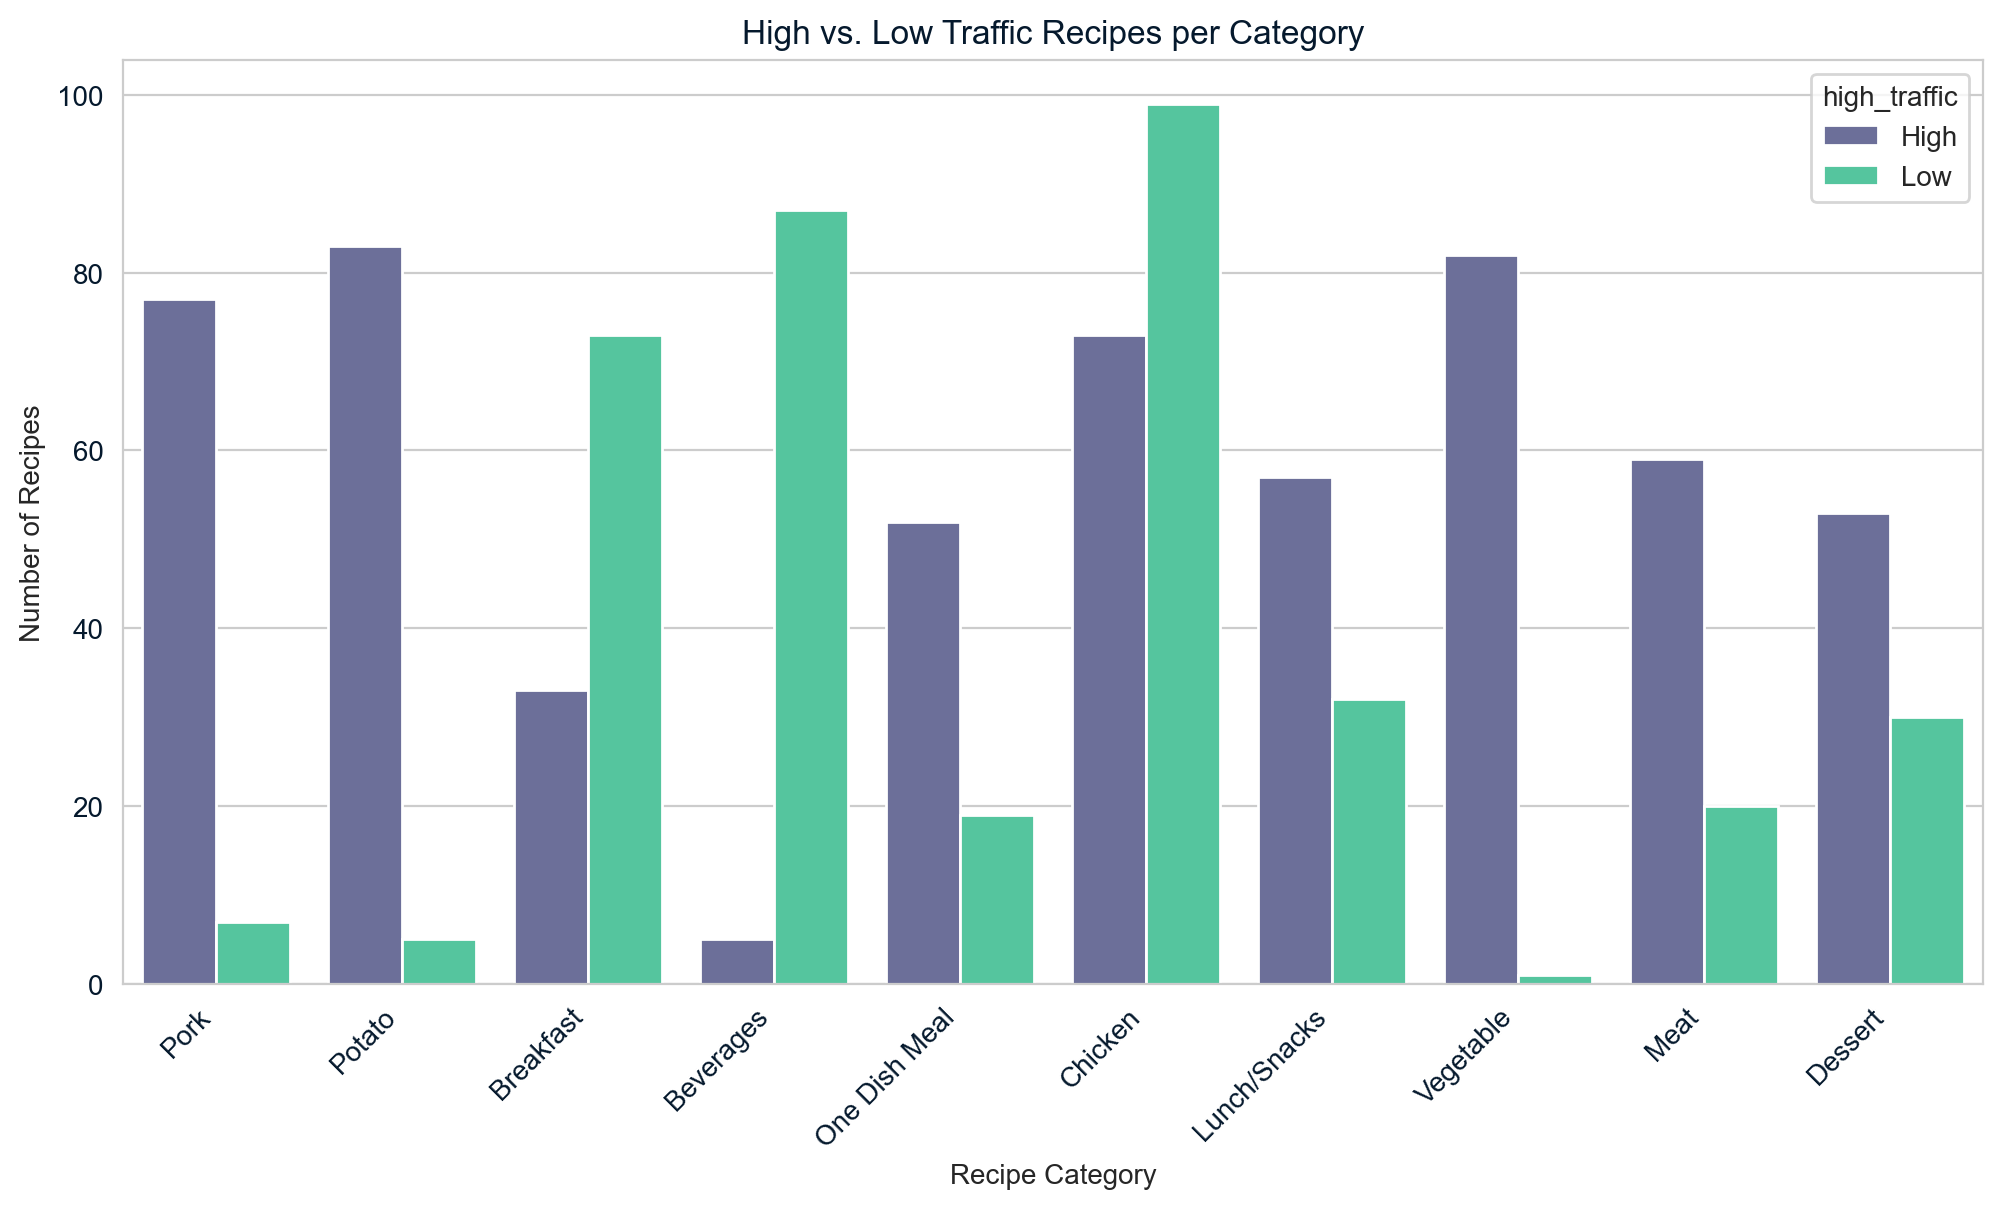

In [81]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a count plot to show High vs. Low traffic per category
sns.countplot(data=data, x="category", hue="high_traffic")

# Customize labels and title
plt.xticks(rotation=45, ha="right")  # Rotate category names for readability
plt.xlabel("Recipe Category")
plt.ylabel("Number of Recipes")
plt.title("High vs. Low Traffic Recipes per Category")

# Show plot
plt.show()


From the percentage High-traffic by category plot we gather that:
- _Top Categories for High Traffic_ : Vegetable , Potato , and Pork.
These categories are very likely to attract traffic when featured.
- _Moderate High-Traffic Categories_:
Meat, One Dish Meal, and Lunch/Snacks have a good chance of getting high traffic.
 Recipes in these categories still perform well.
- _Lower High-Traffic Categories_:
Dessert and Chicken have a moderate chance of attracting high traffic.
 Breakfast struggles to get high traffic.
- _Worst Performing Category_:
Beverages → Almost always low traffic!
This suggests that featuring beverages on the homepage may not be a great strategy.
- _What This Means_:
 Category is a key predictor of high traffic.
 Featuring Vegetable, Potato, and Pork recipes can maximize traffic.
 Beverages should be reconsidered for homepage selection.

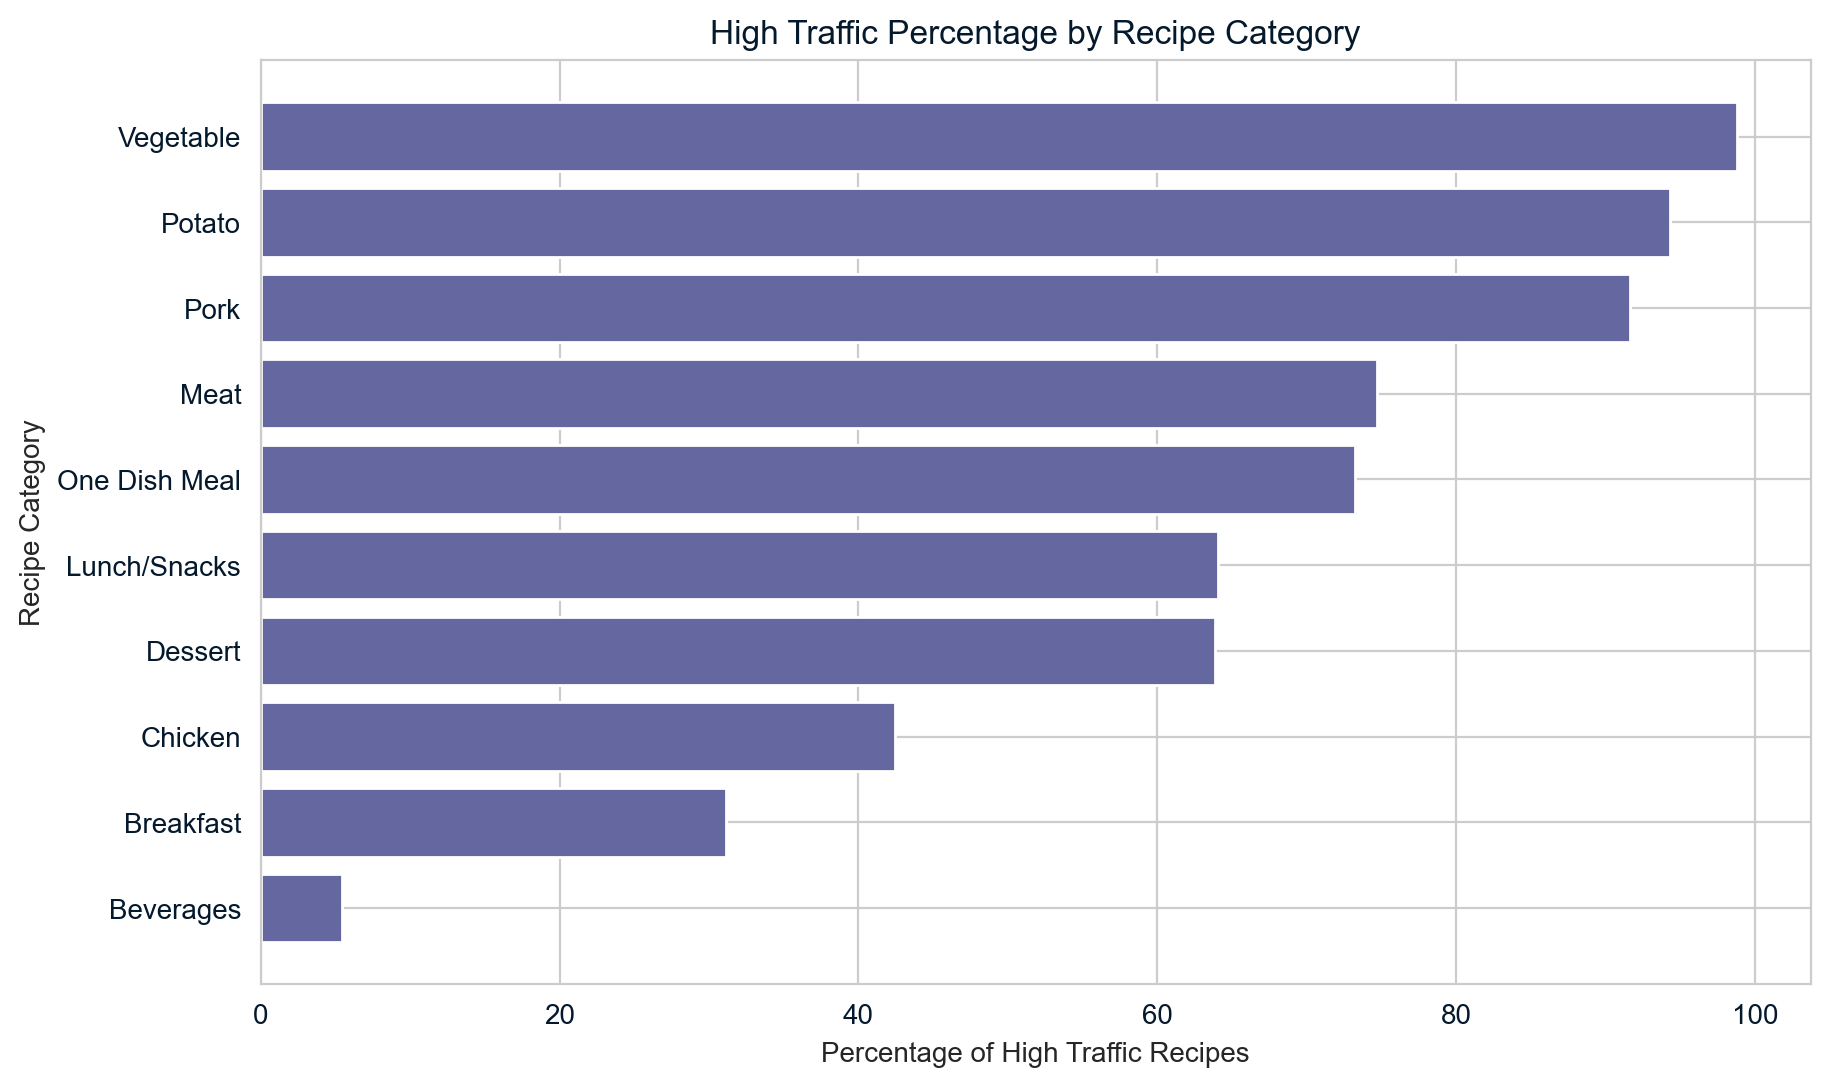

In [82]:
# calculate High-traffic percentage per category
category_traffic_percentage = (
    data.groupby("category")["high_traffic"]
    .value_counts(normalize=True)
    .unstack() * 100  
)
# Sort categories by High-Traffic percentage for better visualization
category_traffic_percentage_sorted = category_traffic_percentage["High"].sort_values()

# Set figure size
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
plt.barh(category_traffic_percentage_sorted.index, category_traffic_percentage_sorted)

# Add labels and title
plt.xlabel("Percentage of High Traffic Recipes")
plt.ylabel("Recipe Category")
plt.title("High Traffic Percentage by Recipe Category")

# Show plot
plt.show()


# **Model** **Development**
Predicting traffic flow is a binary classification problem in machine learning. I am choosing Logistic Regression as the base model because it is simple, interpretable, and easy to implement.
and provides probabilistic outputs, making it useful for understanding decision boundaries. I am choosing Random Forest Classifier as the comparison model because it captures non-linear relationships and interactions between features and is robust to noise and overfitting.

For evaluation I'm choosing recall metric. Recall measures how well the model identifies all actual high-traffic recipes.

## Prepare data for modelling
We shall use all features available to predict the target variable high_traffic.
I have preprocessed the data as follows:
- converted category to numeric using one-hot encoding and traffic_high to numeric using binary-encoding
- Split data into training and test sets
-  Standardized numerical features to cater for outliers

In [83]:
# Binary encoding for "high_traffic" (High = 1, Low = 0)
data["high_traffic"] = data["high_traffic"].map({"High": 1, "Low": 0})
data['high_traffic'].unique()

array([1, 0])

In [84]:
# One-Hot Encoding for "category"
df_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)
df_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,1,399.26,19.56,5.23,29.82,6,1,0,0,0,0,0,0,1,0,0
1,2,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,0,1,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,1,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,0,0,0,0,0,0,0,0,0,0


In [85]:
# Define X and y
X = df_encoded.drop('high_traffic', axis =1)
y = df_encoded['high_traffic']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# standardize numerical features
scaler = StandardScaler()
num_features = ["calories", "carbohydrate", "sugar", "protein", "servings"]

# Fit on training data and transform both train & test sets
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (757, 15)
Test Shape: (190, 15)


## Logistic Regrssion 

In [86]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#  Make predictions on test data
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72        75
           1       0.83      0.75      0.79       115

    accuracy                           0.76       190
   macro avg       0.75      0.76      0.75       190
weighted avg       0.77      0.76      0.76       190



## Random Forest Classifier

In [87]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))



 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        75
           1       0.81      0.74      0.77       115

    accuracy                           0.74       190
   macro avg       0.73      0.74      0.73       190
weighted avg       0.75      0.74      0.74       190



### Find best parameters for rf

In [88]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [89]:
# Train the final model with the best hyperparameters
final_rf = RandomForestClassifier(**best_params, random_state=42)
final_rf.fit(X_train, y_train)

# Make predictions
y_pred_final = final_rf.predict(X_test)

# Evaluate performance
print("\n Classification Report:\n", classification_report(y_test, y_pred_final))



 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66        75
           1       0.78      0.76      0.77       115

    accuracy                           0.73       190
   macro avg       0.71      0.72      0.72       190
weighted avg       0.73      0.73      0.73       190



### Feature importances for rf
- Nutritional features: protein, calories, and sugar are the top 3 factors
- category influence: Vegetables, potato, and breakfast are the top 3 factors

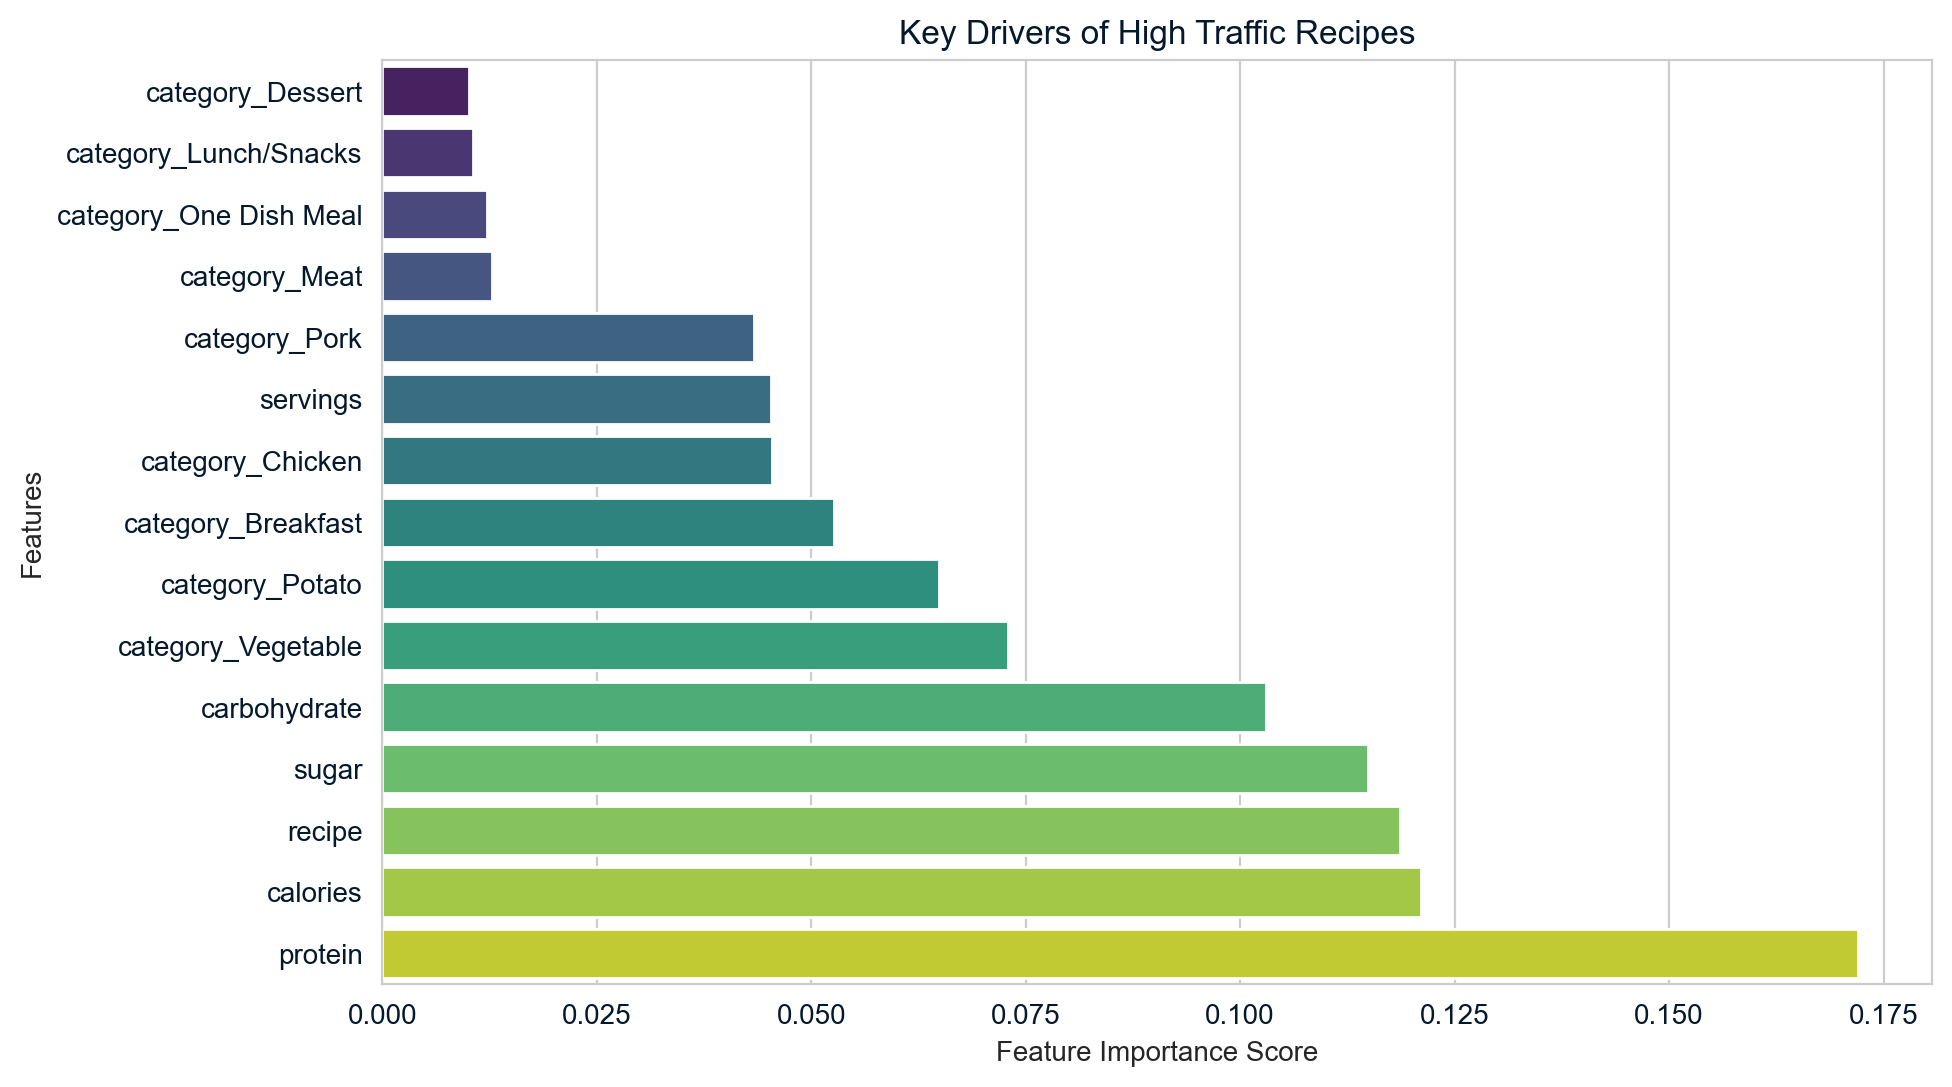

In [91]:
# Feature Importance Analysis
importances = final_rf.feature_importances_
feature_names = X_train.columns

# Sort feature importance values
sorted_idx = importances.argsort()

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="viridis")

# Customize labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Key Drivers of High Traffic Recipes")
fig.savefig('keydrivers.png')

#### Model Evaluation
Random forest has slightly better recall at 0.76 compared to Logistic Regression at 0.75.
Thus Random Forest fits the features better

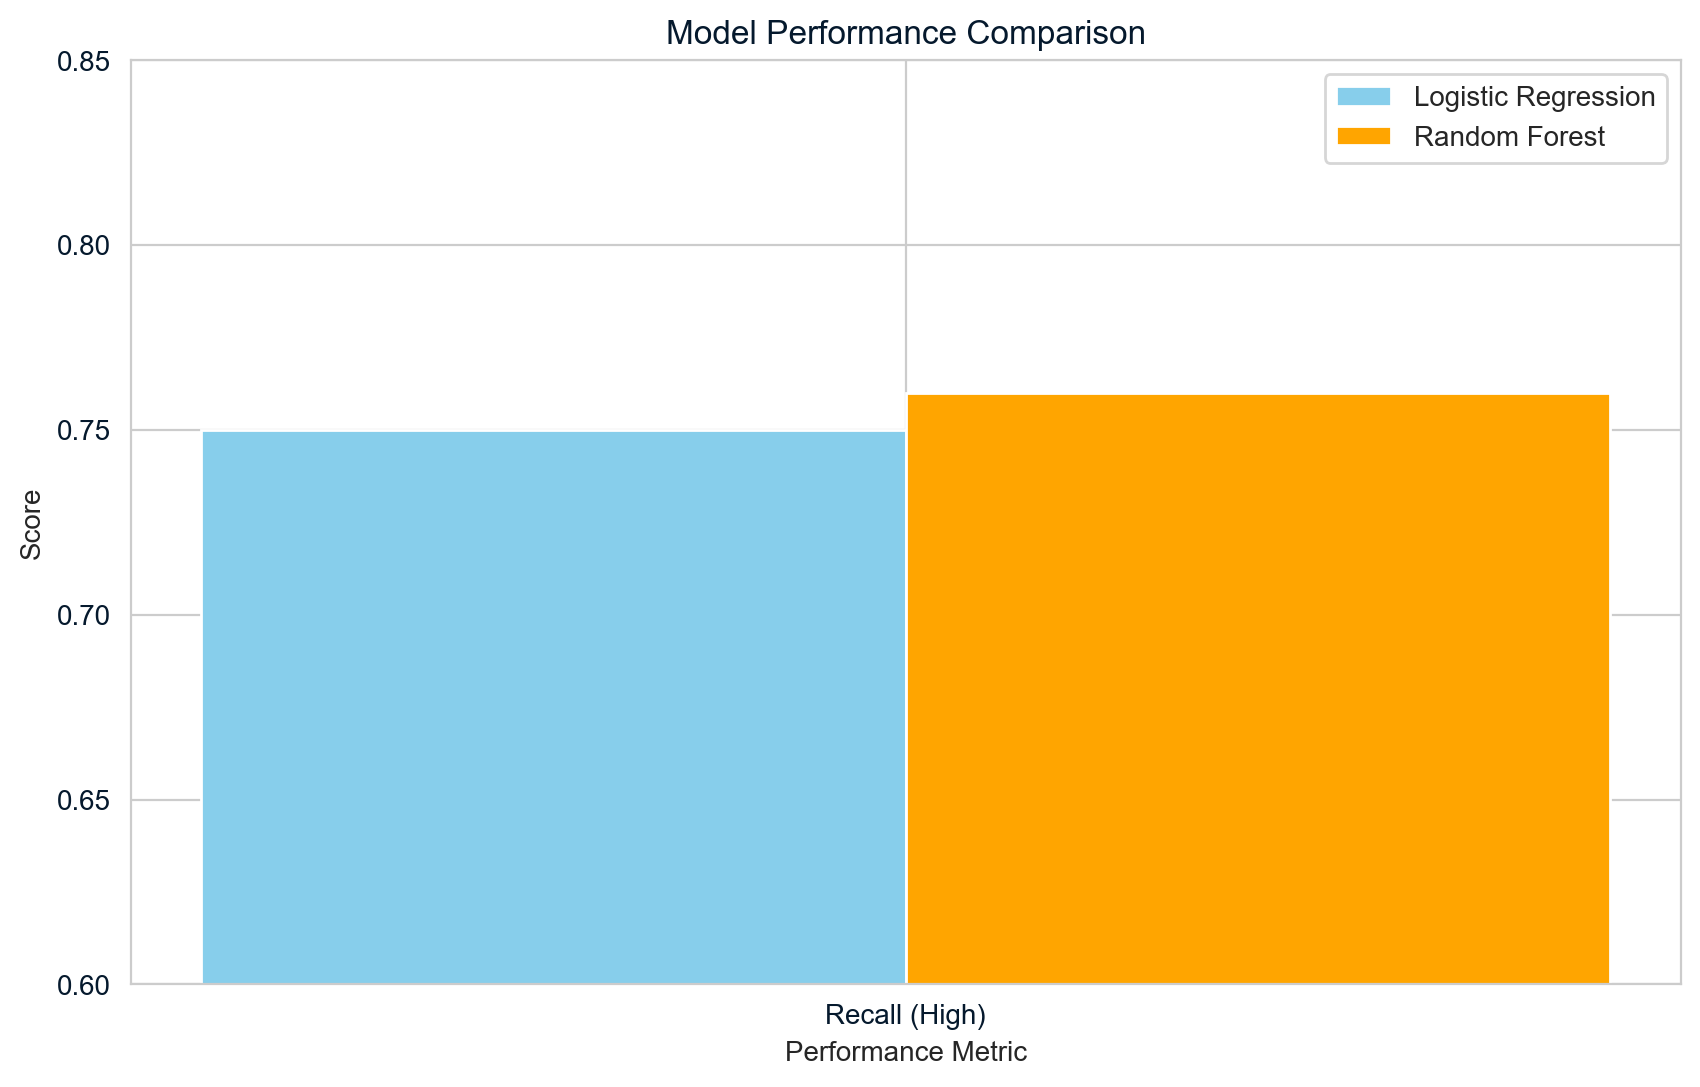

In [90]:
# Performance metrics for Logistic Regression
log_reg_metric = [0.75]  # [Recall]

# Performance metrics for Random Forest (Final Model)
rf_metric = [0.76]  # [Recall]

# Metric names
metric = [ "Recall (High)"]

# Bar width
bar_width = 0.35
x = np.arange(len(metric))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, log_reg_metric, bar_width, label="Logistic Regression", color="skyblue")
plt.bar(x + bar_width/2, rf_metric, bar_width, label="Random Forest", color="orange")

# Customize plot
plt.xlabel("Performance Metric")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(ticks=x, labels=metric)
plt.legend()
plt.ylim(0.6, 0.85)  # Adjust Y-axis range for better visibility

# Show plot
fig.savefig('recall.png')

## Business Metric & KPI Definition
- Goal: Correctly predict high-traffic recipes 80% of the time.

-  Key Performance Indicator (KPI):

The model must achieve at least 80% recall, meaning it correctly identifies 80% or more of actual high-traffic recipes.
If recall is below 80%, the model is missing too many high-traffic recipes, failing to meet the business goal.

-  Current Performance:

The Random Forest Classifier achieves 76% recall, meaning it correctly predicts 76% of high-traffic recipes.
This is close to the target but needs further optimization to fully meet business expectations.

# Recommendations
To maintain high user engagement, we recommend deploying the Random Forest Classifier into production. This model correctly predicts 76% of high-traffic recipes, significantly improving recipe selection over the current random approach. To ensure continuous improvement and maximize impact, we suggest the following actions:

1. Prioritize High-Traffic Categories
 
-  Feature popular categories (e.g., Vegetables, Potato, Pork) on the homepage to maximize engagement.
- Develop strategies to boost low-traffic categories (Desserts, Lunch/Snacks) through seasonal promotions and enhanced visuals.

2. Optimize Recipe Selection Using Nutrition Insights
 
-  Personalize recommendations by featuring high-protein and high-calorie recipes for users who engage with similar content.

3. Improve Model Performance to Reach 80% Recall
 
-  Conduct A/B testing to fine-tune the decision threshold for balancing recall and precision.
-  Further optimize Random Forest parameters to enhance accuracy.

4. A/B Testing for Recipe Engagement
 
-  Experiment with titles, descriptions, and images to analyze click-through rates (CTR) and user interest.


5. Deployment & Continuous Monitoring
 
-  Integrate predictions into the website’s recommendation system.
-  Monitor performance regularly and retrain the model to maintain accuracy.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation